In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('airlines_flights_data.csv')

In [3]:
data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
data.tail()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
data.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [7]:
from scipy.stats import chi2_contingency, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, ShuffleSplit

In [8]:
data.sample(7)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
109457,109457,GO_FIRST,G8-399,Bangalore,Night,one,Early_Morning,Kolkata,Economy,9.08,48,6186
179935,179935,Indigo,6E-6151,Hyderabad,Morning,zero,Morning,Chennai,Economy,1.33,43,1788
225927,225927,Air_India,AI-619,Mumbai,Night,one,Morning,Delhi,Business,12.75,11,41101
210415,210415,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Business,2.17,36,22152
192229,192229,Vistara,UK-836,Chennai,Morning,one,Night,Mumbai,Economy,12.08,37,4393
33255,33255,Vistara,UK-813,Delhi,Evening,one,Morning,Hyderabad,Economy,15.50,35,5761
40952,40952,GO_FIRST,G8-275,Delhi,Evening,one,Late_Night,Chennai,Economy,4.83,37,4506


In [9]:
data.shape

(300153, 12)

## EDA and Analysis

## Descriptive Statistics

In [10]:
def descriptive_analysis(dataset:pd.DataFrame, n_cols):
    stats_data = dataset[n_cols]. describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])
    stats_data.loc['skew'] = dataset[n_cols].skew()
    stats_data.loc['kurtosis'] = dataset[n_cols].kurtosis()

    q1 = dataset[n_cols].quantile(0.25)
    q3 = dataset[n_cols].quantile(0.75)
    iqr = q3 - q1

    outlier_dect=((dataset[n_cols] < (q1 - 1.5 * iqr)) | (dataset[n_cols] > (q3 + 1.5*iqr)))
    outlier_count = outlier_dect.sum().rename('outlier_count')
    stats_data = pd.concat([stats_data, outlier_count.to_frame().T])
    return stats_data
num_cols = ["index", "duration", "days_left", "price"]
num_stats = descriptive_analysis(data, num_cols)
print(num_stats)

                       index       duration      days_left          price
count          300153.000000  300153.000000  300153.000000  300153.000000
mean           150076.000000      12.221021      26.004751   20889.660523
std             86646.852011       7.191997      13.561004   22697.767366
min                 0.000000       0.830000       1.000000    1105.000000
25%             75038.000000       6.830000      15.000000    4783.000000
50%            150076.000000      11.250000      26.000000    7425.000000
75%            225114.000000      16.170000      38.000000   42521.000000
95%            285144.400000      25.920000      47.000000   63277.000000
99%            297150.480000      29.080000      49.000000   76736.000000
max            300152.000000      49.830000      49.000000  123071.000000
skew                0.000000       0.602899      -0.035464       1.061377
kurtosis           -1.200000      -0.268996      -1.156215      -0.396293
outlier_count       0.000000    2110.0

## Distribution & Outlier Visualization 

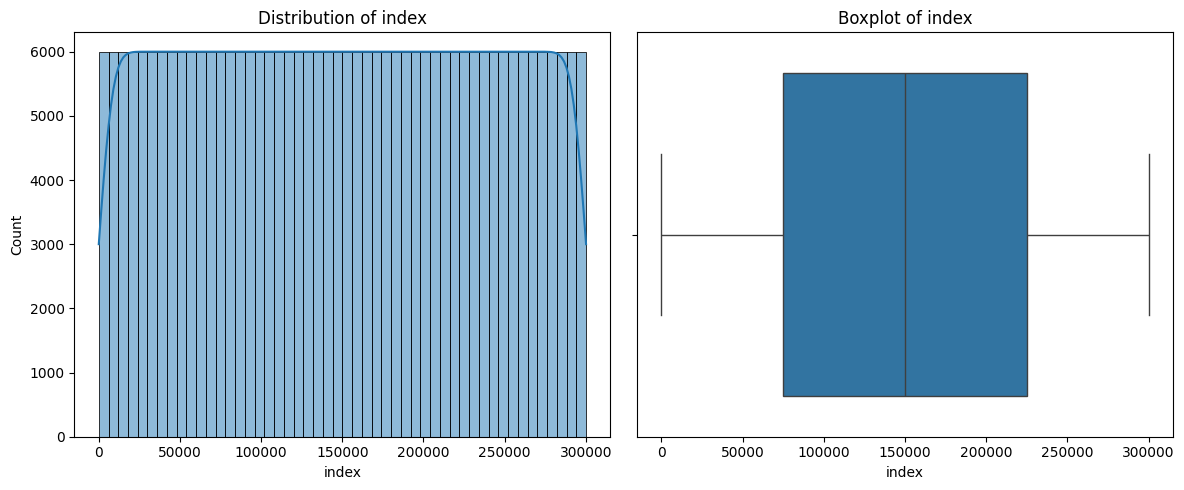

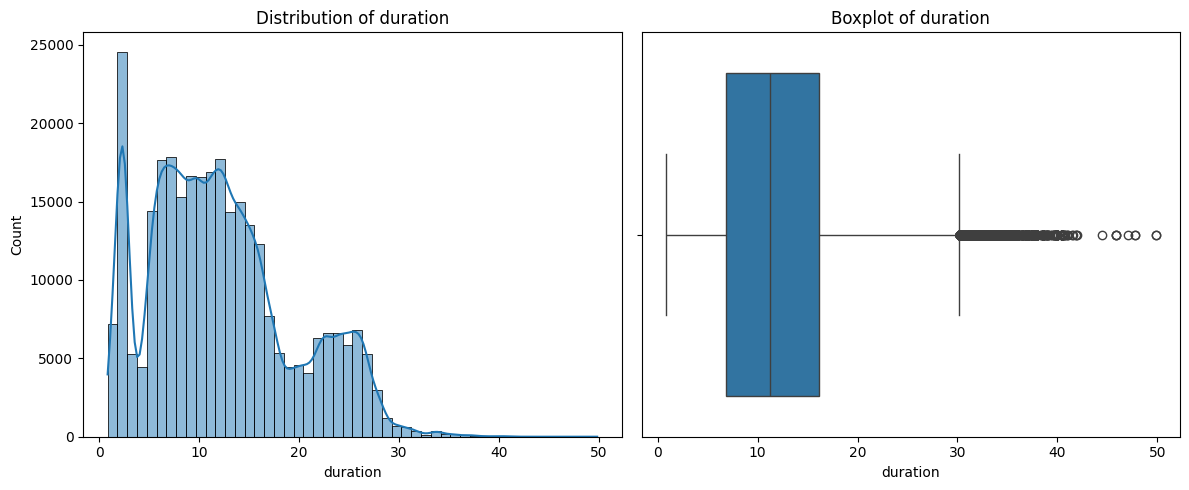

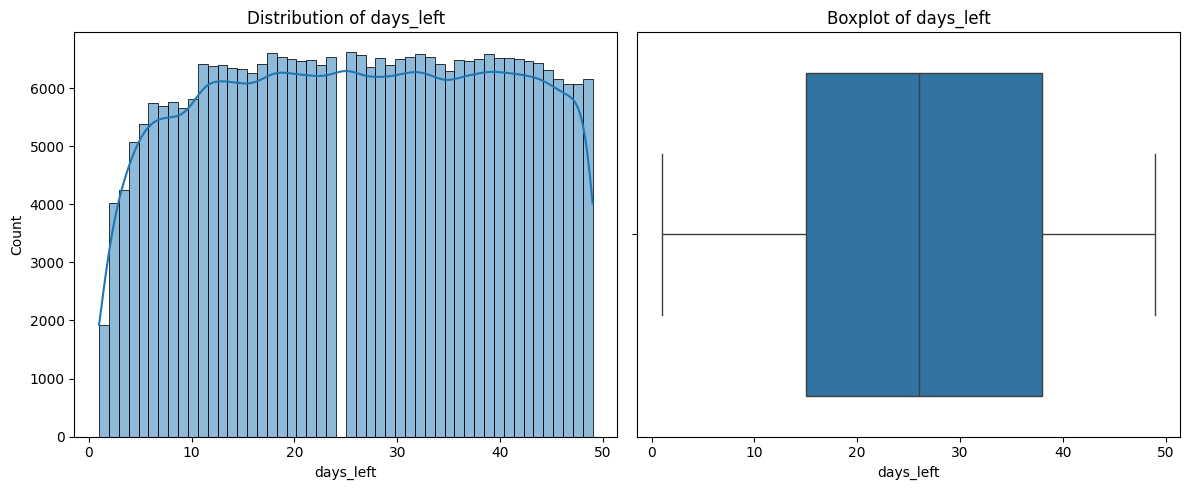

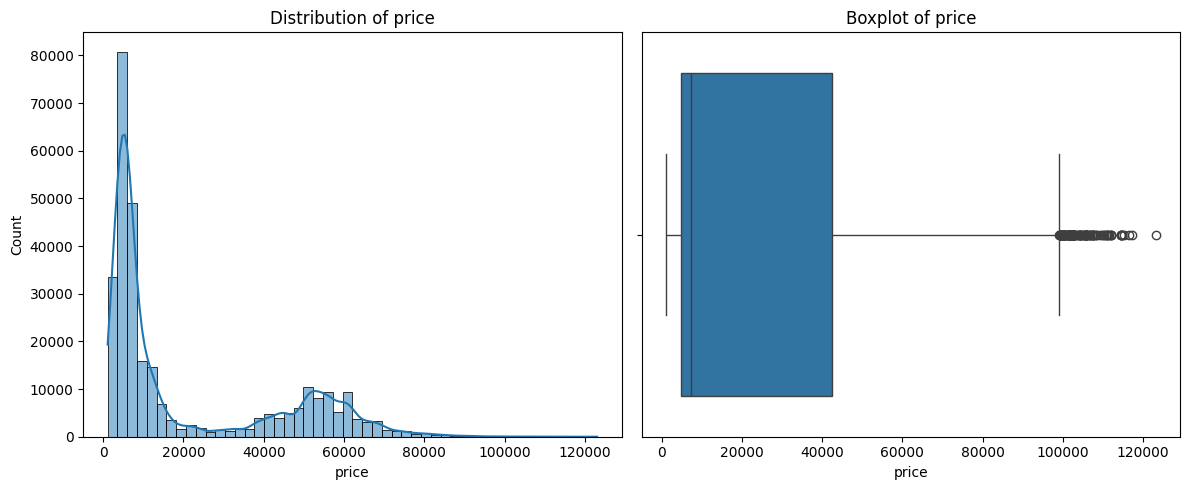

In [11]:
def plot_numerical_distribution(df, num_cols):
    for col in num_cols:
        plt.figure(figsize=(12,5))

        plt.subplot(1,2,1)
        sns.histplot(df[col], kde = True, bins=50)
        plt.title(f"Distribution of {col}")

        #outlier
        plt.subplot(1,2,2)
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.tight_layout()
        plt.show()

plot_numerical_distribution(data, num_cols)

## Correlation Analysis

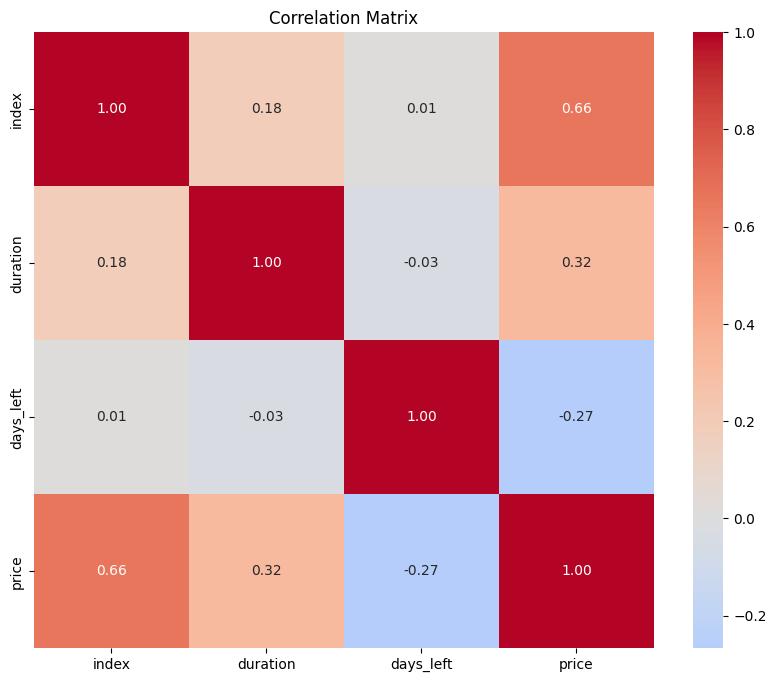

In [12]:
def plot_correlation_matrix(df, n_cols):
    corr_m = df[n_cols].corr(method="spearman")
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_m , annot=True, cmap='coolwarm', center = 0, fmt = '.2f')
    plt.title("Correlation Matrix")
    plt.show()
plot_correlation_matrix(data, num_cols)

## Frequency Analysis

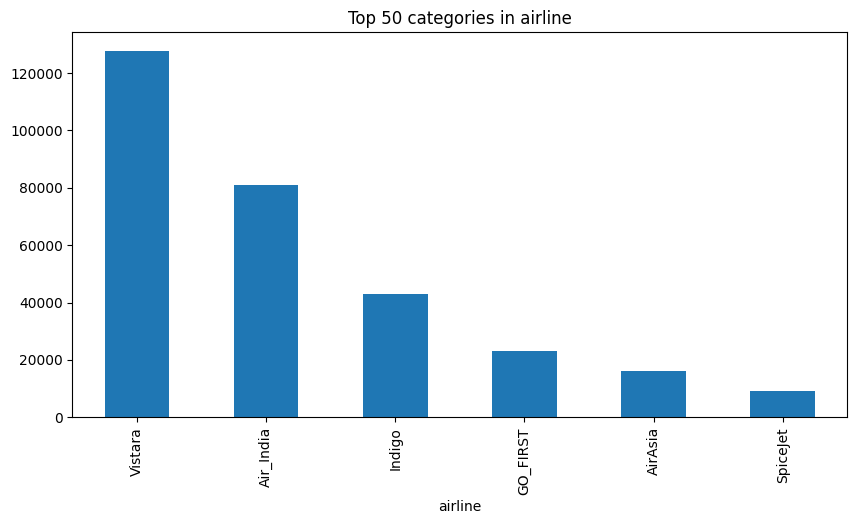

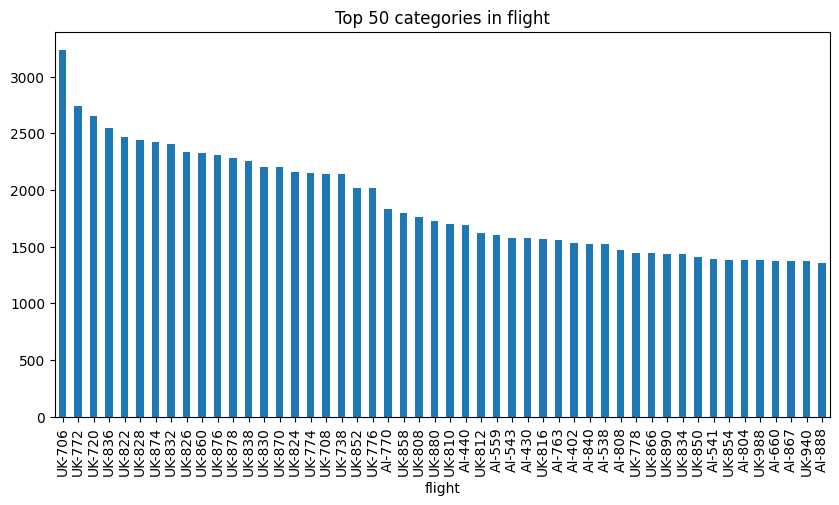

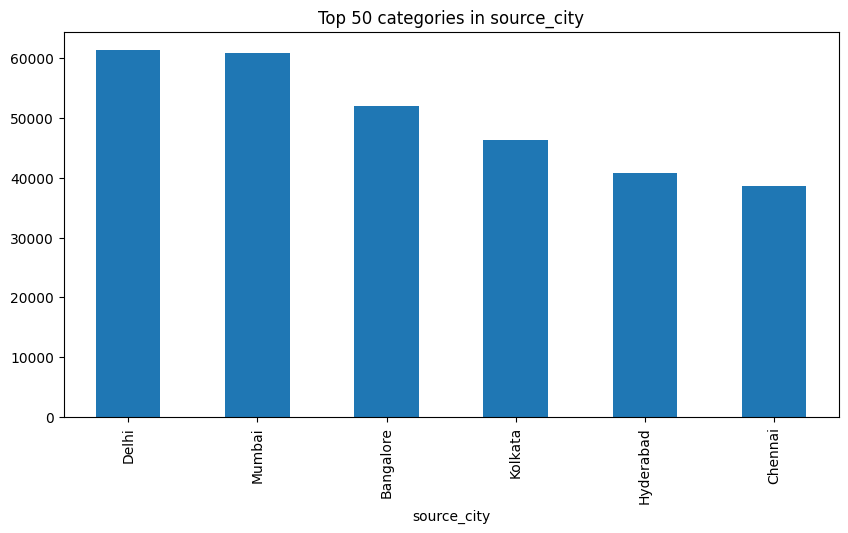

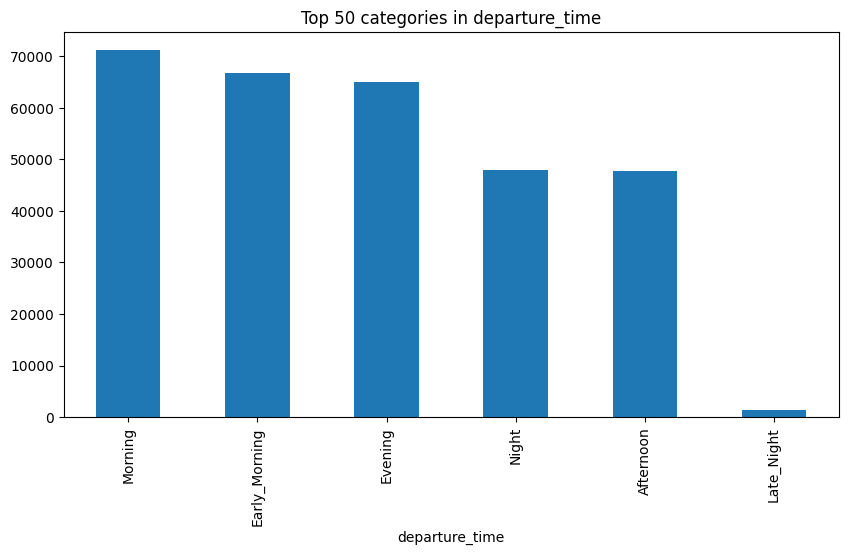

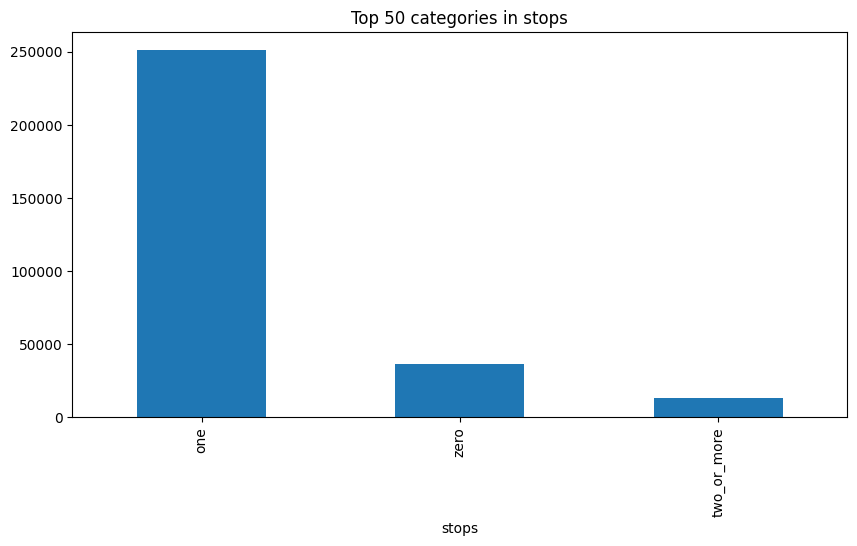

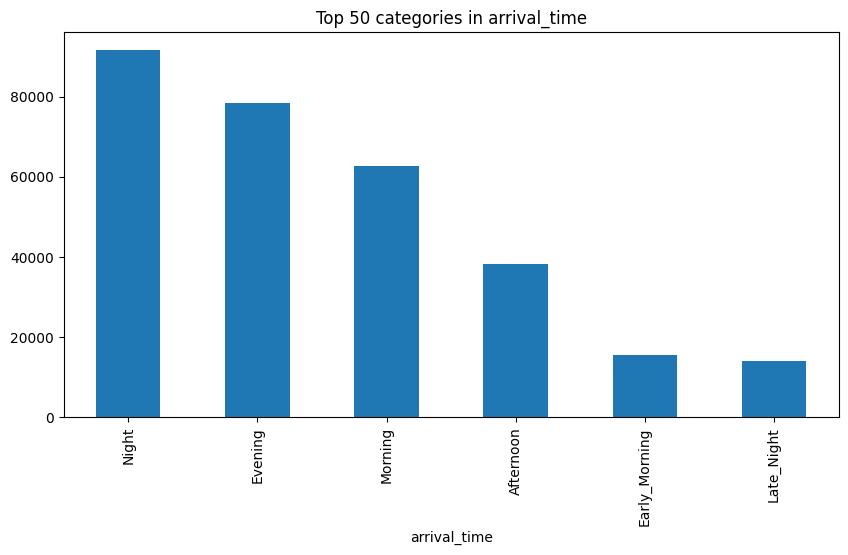

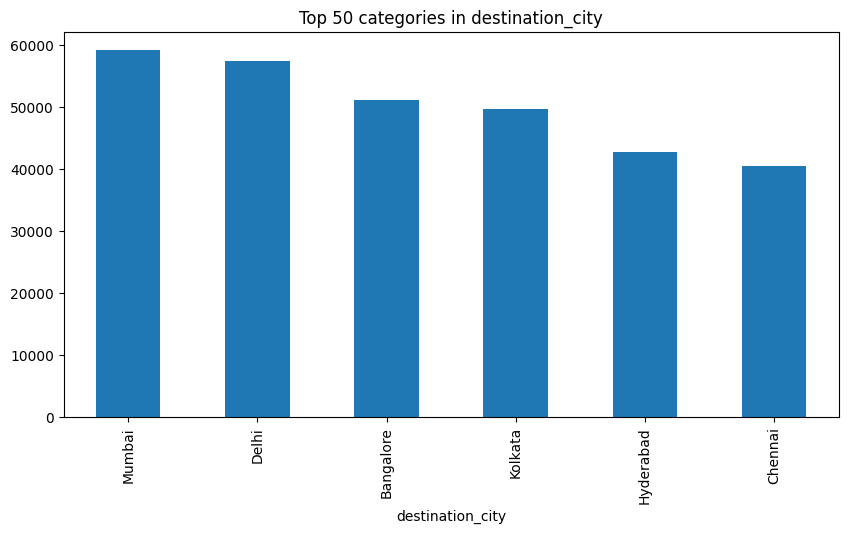

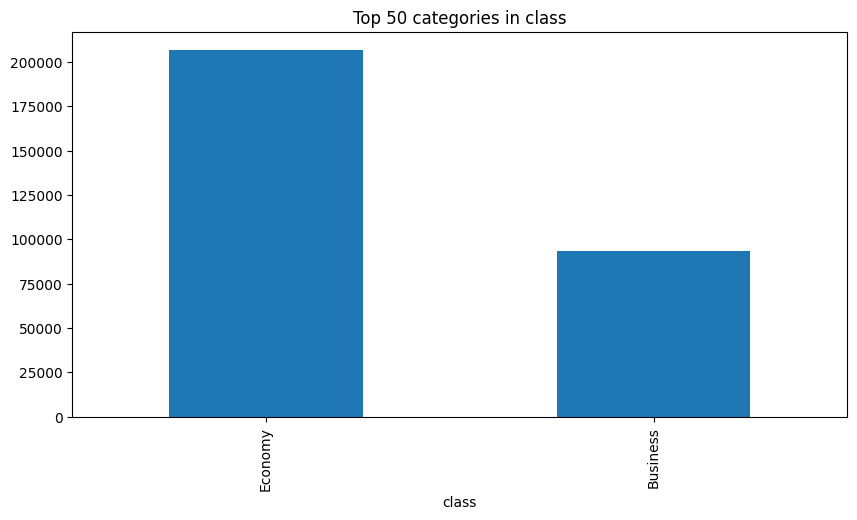

In [13]:
def Freq_analysis(data:pd.DataFrame, cat_columns, top_n:int=50):
    for col in cat_columns:
        freq = data[col].value_counts().nlargest(top_n)

        plt.figure(figsize=(10,5))
        freq.plot(kind="bar")
        plt.title(f"Top {top_n} categories in {col}")
        plt.xticks(rotation = 90)
        plt.show()

cat_cols = data.select_dtypes(include=["object"]).columns
Freq_analysis(data,cat_cols)

## Cardinality & Rare Categories

In [16]:
def analyze_cardinality(data, cat_cols, rare_threshold=0.01):
    cardinality_report = {}
    for col in cat_cols:
        n_unique = data[col].nunique()
        freq = data[col].value_counts(normalize=True)
        rare_cats = freq[freq < rare_threshold].index.tolist()
        cardinality_report[col] ={
            'N_unique' : n_unique,
            'Rare_categories': rare_cats,
            'Suggesstion' : 'Drop or bin rare categories' if rare_cats else "OK"
        }
    return pd.DataFrame(cardinality_report).T
cardinality_report = analyze_cardinality(data, cat_cols)
print(cardinality_report)

                 N_unique                                    Rare_categories  \
airline                 6                                                 []   
flight               1561  [UK-772, UK-720, UK-836, UK-822, UK-828, UK-87...   
source_city             6                                                 []   
departure_time          6                                       [Late_Night]   
stops                   3                                                 []   
arrival_time            6                                                 []   
destination_city        6                                                 []   
class                   2                                                 []   

                                  Suggesstion  
airline                                    OK  
flight            Drop or bin rare categories  
source_city                                OK  
departure_time    Drop or bin rare categories  
stops                                  

## Categorical Associations

In [17]:
def chi_square_test(data, cat1, cat2):
    contingency_table = pd.crosstab(data[cat1], data[cat2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2/n*(min(contingency_table.shape)-1))
    return {
        "Chi2_stat" : chi2,
        "p_value" : p,
        "Cramers_V" : cramers_v,
        "interpretation" : "Strong assocciation" if cramers_v > 0.25 else "Weak/moderate"    
        }
result = chi_square_test(data, "airline", "source_city")
print("checking relation between airlines and source_city : ", result)

checking relation between airlines and source_city :  {'Chi2_stat': 5740.747763040632, 'p_value': 0.0, 'Cramers_V': 0.3092415850132074, 'interpretation': 'Strong assocciation'}


In [18]:
result = chi_square_test(data, "airline", "flight")
print("Checking relaation between airlines and flight :", result)

Checking relaation between airlines and flight : {'Chi2_stat': 1500765.0, 'p_value': 0.0, 'Cramers_V': 5.0, 'interpretation': 'Strong assocciation'}


In [19]:
result = chi_square_test(data, "airline", "departure_time")
print("Checking relation between airlines and departure_time :", result)

Checking relation between airlines and departure_time : {'Chi2_stat': 9762.999143131447, 'p_value': 0.0, 'Cramers_V': 0.4032786991570907, 'interpretation': 'Strong assocciation'}


In [20]:
result = chi_square_test(data, "airline", "stops")
print("Checking relation between airlines and stops :", result)

Checking relation between airlines and stops : {'Chi2_stat': 18166.156417759023, 'p_value': 0.0, 'Cramers_V': 0.34791662220130387, 'interpretation': 'Strong assocciation'}


In [21]:
result = chi_square_test(data, "airline", "arrival_time")
print("Checking relation between airlines and arrival_time :", result)

Checking relation between airlines and arrival_time : {'Chi2_stat': 28932.298024552056, 'p_value': 0.0, 'Cramers_V': 0.6942327908563802, 'interpretation': 'Strong assocciation'}


In [22]:
result = chi_square_test(data, "airline", "destination_city")
print("Checking relation between airlines and destination_city :", result)

Checking relation between airlines and destination_city : {'Chi2_stat': 6283.156376870961, 'p_value': 0.0, 'Cramers_V': 0.3235210863950676, 'interpretation': 'Strong assocciation'}


In [23]:
result = chi_square_test(data, "airline", "class")
print("Checking relation between airlines and class :", result)

Checking relation between airlines and class : {'Chi2_stat': 60492.80487209428, 'p_value': 0.0, 'Cramers_V': 0.44893195203641467, 'interpretation': 'Strong assocciation'}


## Combined Analysis

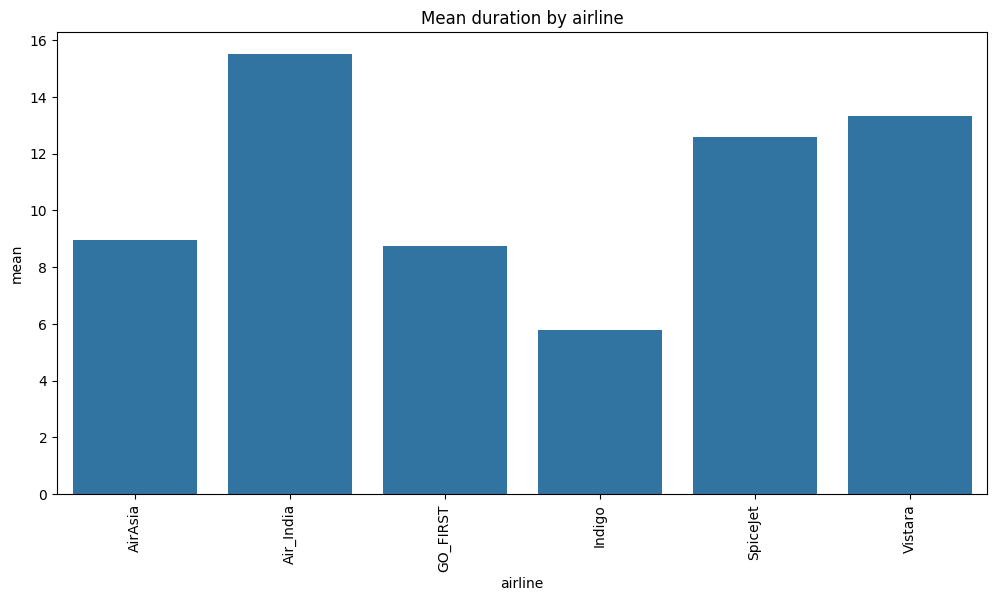

,mean,median,std,count
airline,,,,
AirAsia,8.941714,9.33,4.173152,16098
Air_India,15.504235,15.00,7.613365,80892
GO_FIRST,8.755380,8.83,4.015146,23173
Indigo,5.795197,6.00,2.769322,43120
SpiceJet,12.579767,12.00,8.927157,9011
Vistara,13.326634,12.50,6.777230,127859


In [25]:
def plot_grouped_stats(data, num_col, cat_col):
    grouped = data.groupby(cat_col)[num_col].agg(['mean', 'median', 'std', 'count'])

    plt.figure(figsize=(12,6))
    sns.barplot(x=grouped.index, y=grouped['mean'])
    plt.title(f"Mean {num_col} by {cat_col}")
    plt.xticks(rotation = 90)
    plt.show()
    return grouped
plot_grouped_stats(data, "duration", "airline")

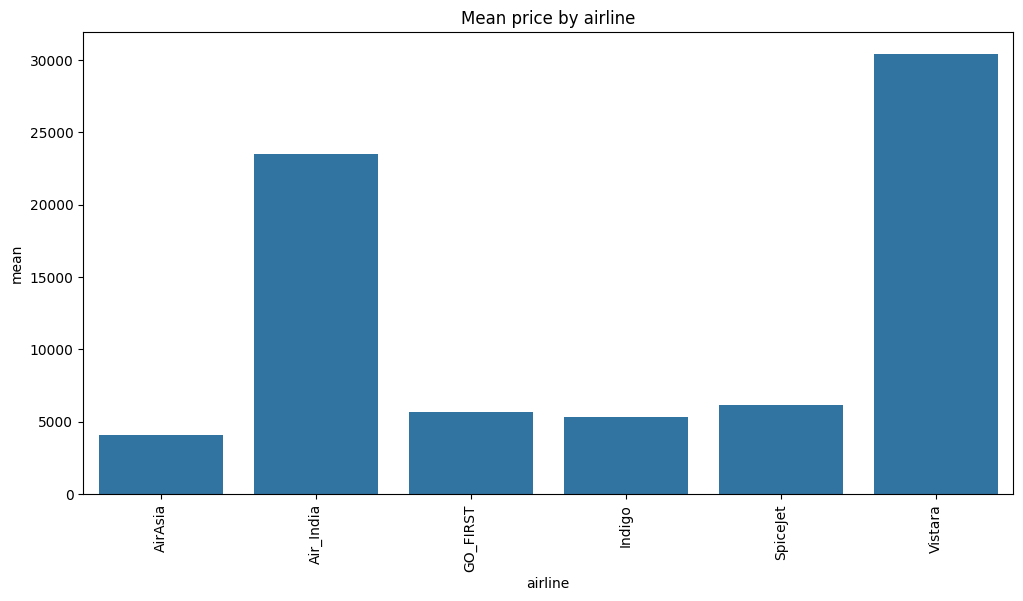

,mean,median,std,count
airline,,,,
AirAsia,4091.072742,3276.0,2824.055172,16098
Air_India,23507.019112,11520.0,20905.116909,80892
GO_FIRST,5652.007595,5336.0,2513.865560,23173
Indigo,5324.216303,4453.0,3268.894831,43120
SpiceJet,6179.278881,5654.0,2999.630406,9011
Vistara,30396.536302,15543.0,25637.159445,127859


In [26]:
plot_grouped_stats(data, "price", "airline")

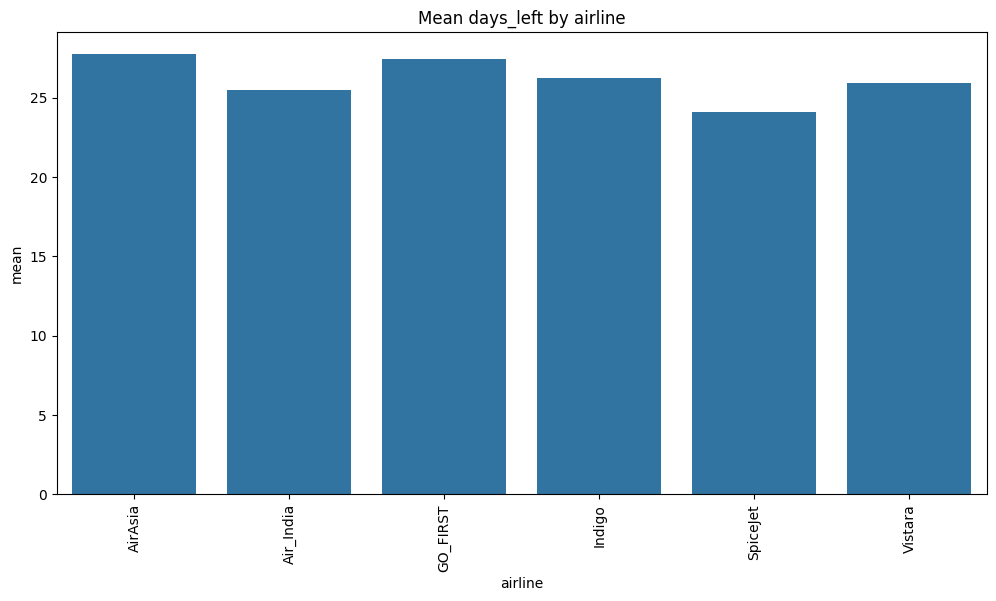

,mean,median,std,count
airline,,,,
AirAsia,27.735184,28.0,12.889223,16098
Air_India,25.497466,26.0,13.725776,80892
GO_FIRST,27.430415,27.0,12.385957,23173
Indigo,26.264309,27.0,13.717115,43120
SpiceJet,24.122850,23.0,13.658816,9011
Vistara,25.894532,26.0,13.638537,127859


In [27]:
plot_grouped_stats(data, "days_left", "airline")

## Anova

In [28]:
def anova_test (data, num_cols, cat_cols):
    groups = data.groupby(cat_cols)[num_cols].apply(list)
    f_stat, p_value = f_oneway(*groups)
    return {
        'f_statistics' : f_stat,
        'p_value'  : p_value,
        'interpretation' : "Significant difference" if p_value < 0.05 else "No significant difference"
    }
annova_result = anova_test(data, "price", "airline")

print("Annova test between price and airline :", annova_result)

Annova test between price and airline : {'f_statistics': 17194.40209609235, 'p_value': 0.0, 'interpretation': 'Significant difference'}


In [29]:
annova_result = anova_test(data, "days_left", "airline")

print("Annova test between days_left and airline :", annova_result)

Annova test between days_left and airline : {'f_statistics': 166.2973097418533, 'p_value': 3.15495068283172e-177, 'interpretation': 'Significant difference'}


In [30]:
annova_result = anova_test(data, "duration", "airline")

print("Annova test between duration and airline :", annova_result)

Annova test between duration and airline : {'f_statistics': 15963.552828148684, 'p_value': 0.0, 'interpretation': 'Significant difference'}


In [31]:
annova_result = anova_test(data, "index", "airline")

print("Annova test between index and airline :", annova_result)

Annova test between index and airline : {'f_statistics': 11029.958344972356, 'p_value': 0.0, 'interpretation': 'Significant difference'}


## Advanced Preprocessing

In [32]:
def Winsorization_col (data, column, lower: float=0.05, upper:float=0.95):
    for col in column:
        lower_bound = data[col].quantile(lower)
        upper_bound = data[col].quantile(upper)
        data[col] = data[col].clip(lower_bound, upper_bound)
    return data
data = Winsorization_col(data, num_cols)

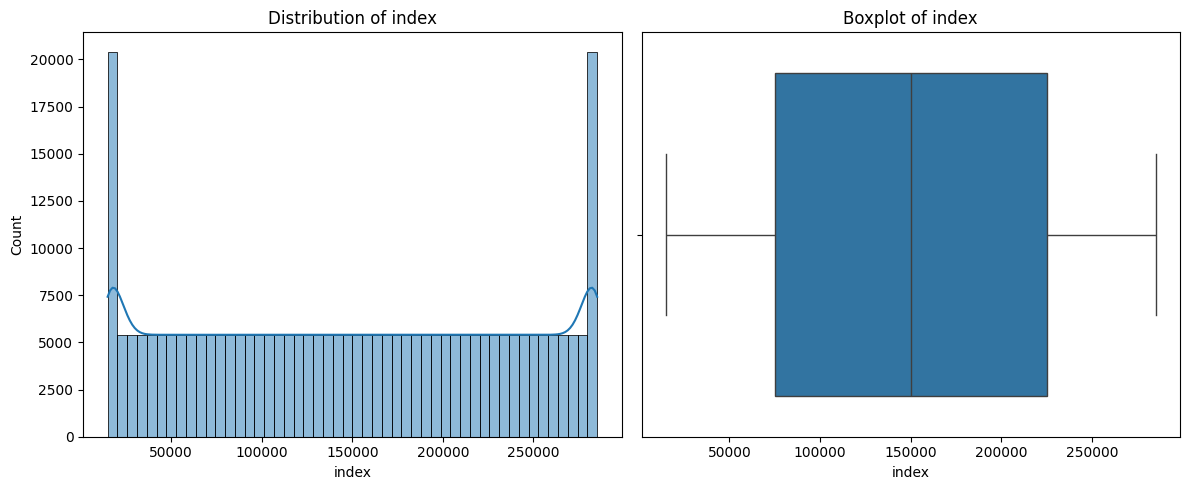

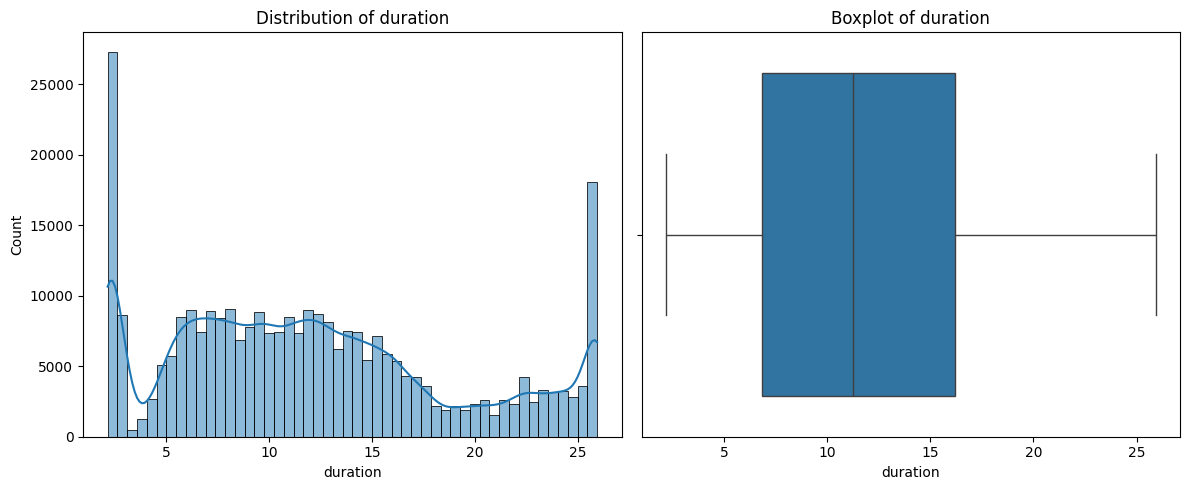

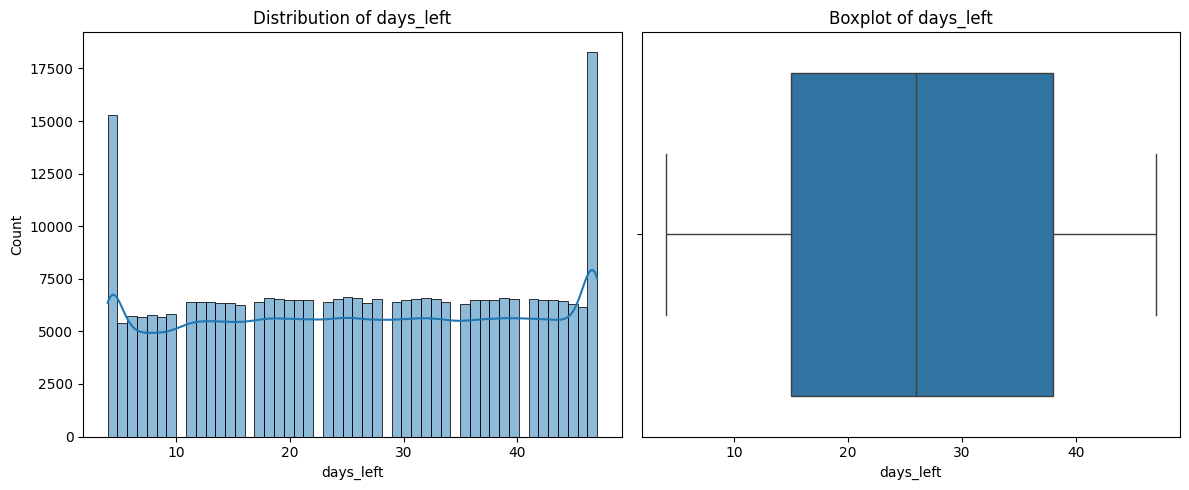

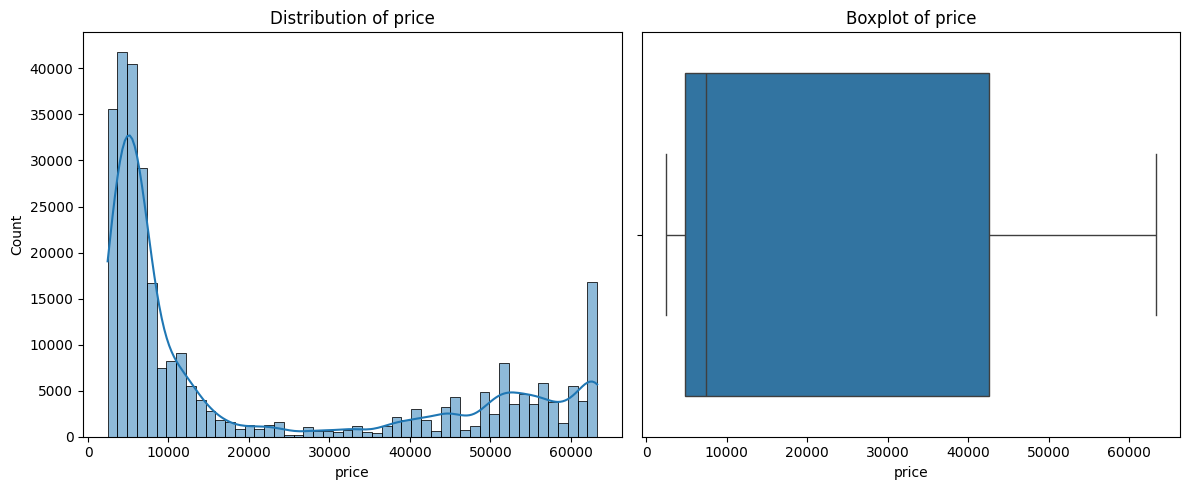

In [34]:
num_cols = ['index', 'duration', 'days_left', 'price']
plot_numerical_distribution(data, num_cols)

Encoding categorical variables

In [36]:
def label_encoding(df:pd.DataFrame, cat_cols):
    for col in cat_cols:
        df[col] = LabelEncoder().fit_transform(df[col])
    return df
data = label_encoding(data, cat_cols)

In [37]:
x = data.drop(columns=["airline"])
y = data['airline']

In [38]:
x.shape, y.shape

((300153, 11), (300153,))

In [40]:
x_train, y_train, x_test, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
print("x+_train shape :", x_train.shape, "==", "y_train shape :", y_train.shape)
print("x_test shape :", x_test.shape, "==", "y_test shape : ", y_test.shape)

x+_train shape : (240122, 11) == y_train shape : (60031, 11)
x_test shape : (240122,) == y_test shape :  (60031,)
